# Learn how to load, read and write different commonly used file formats in Python3

In [1]:
# import sth
import os
from os.path import dirname, join, basename, isfile, isdir
import json

## Plain text format (e.g `.txt`) IO processes

In [2]:
### 读txt文件操作
filename = "../data/example.txt"
txt = open(filename)
text_str = txt.read()
print(text_str, type(txt)) #即打印所有文件内容
txt.close()

### 写txt文件操作
filename = "../data/example_write.txt"
txt = open(filename,'w')
txt.write("hello world!")
txt.close()

def read2list(file_path):
    """Read content in a plain text file line by line
    """
    fp = open(file_path)
    content = [line.strip() for line in fp]
    return content

def read2list2(file_path):
    lines = open(file_path).read().splitlines()
    return lines

data = read2list("../data/bad_data_name.txt")
print(data, len(data))

lines = read2list2("/home/haimingzhang/Research/Face/Wav2Lip/filelists/sync_pairs.txt")
print(lines[:10], len(lines))


My name is zhanghaiming. <class '_io.TextIOWrapper'>
['210905_368_4', '210905_590_4', '210905_590_5', '210905_598_4', '210905_598_5', '210905_647_5', '210905_647_6', '210906_28_6', '210903_8_4', '210903_20_6', '210903_20_7', '210903_20_8', '210903_49_4', '210903_49_6', '210903_49_7', '210903_49_8', '210903_50_4', '210903_50_7', '210903_51_5', '210903_51_6', '210903_51_7', '210903_197_0', '210903_198_0', '210904_21_1', '210904_22_3', '210904_22_4', '210904_22_6', '210904_22_7', '210904_22_20', '210904_28_0', '210904_28_2', '210904_28_3', '210904_28_4', '210904_28_5', '210904_28_7', '210904_244_4', '210904_244_5', '210904_244_6', '210904_244_7', '210904_248_0', '210904_248_1', '210904_248_2', '210904_248_3', '210904_248_4', '210904_248_5', '210904_397_4', '210904_397_12', '210904_402_3', '210904_402_8', '210904_419_5', '210904_628_0', '210904_628_1', '210904_628_3', '210904_628_5', '210904_1168_6', '210904_1168_7', '210904_1168_8', '210904_1210_0', '210904_1214_1', '210904_1223_8', '2109

### 使用numpy读txt文件

In [3]:
import numpy as np

input_text_file = "test.txt"
data_input = np.loadtxt(input_text_file, delimiter='\n', dtype=np.str)
print(data_input.shape, data_input[:3])


def read_txt_to_numpy(file_path):
    a = np.loadtxt(file_path)
    print(a.shape, a.dtype)

def read_kitti_oxts(dataset_root, sequence_num):
    """
    read txt file line by line to a dictionary
    """
    oxts_file = os.path.join(dataset_root, 'oxts/{0:04d}.txt'.format(int(sequence_num)))

    with open(oxts_file, 'r') as f:
        lines = f.readlines()
    
    print(len(lines))
    oxts_dict = {}
    for i, line in enumerate(lines):
        oxt = line.strip().split(' ')
        oxts_dict[i] = oxt
    return oxts_dict

(1098,) ['test/7974/7974-cut-51' 'test/7974/7974-cut-38' 'test/7974/7974-cut-73']


## json format file IO processes

In [ ]:
### Load json file content to dictionary
basedir = "./data/"
splits = ['train', 'val', 'test']
metas = {}
for s in splits:
    with open(os.path.join(basedir, 'transforms_{}.json'.format(s)), 'r') as fp:
        metas[s] = json.load(fp)

In [12]:
import cv2
def validate_data(vid_file):
    video_stream = cv2.VideoCapture(vid_file)
    FRAME_COUNT = int(video_stream.get(cv2.CAP_PROP_FRAME_COUNT))
    vidname = os.path.basename(vid_file).split('.')[0]
    dirname = vid_file.split('/')[-2]

    fulldir = os.path.join("/data/zhanghm/speech_chinese_preprocessed", dirname, vidname)
    face_images_list = [file.path for file in os.scandir(fulldir)]
    face_num = len(face_images_list)

    if face_num != FRAME_COUNT:
        print(f"Error in {vid_file} video length:{FRAME_COUNT} face_num:{face_num}")


validate_data("/data/zhanghm/speech_chinese/210903/210903_101_17.mp4")


## Load `.mat` Matlab type matrix file

In [10]:
import numpy as np
from scipy.io import loadmat, savemat

def load_mat_file_example():
    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-30fps/epoch_20_000000/000000.mat"
    input_data = "../data/1.mat"

    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess_old/gangqiang-2_deep3Dface/000000.mat"
    face_params = loadmat(input_data)

    input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess/gangqiang_deep3Dface/000000.mat"
    face_params2 = loadmat(input_data)

    diff = face_params2['coeff'] - face_params['coeff']
    print(np.max(diff))

    for key, value in face_params.items():
        if not key.endswith("__"):
            print(key, value.shape)
        else:
            print(key, value)

    coeff = face_params["coeff"]
    print(np.min(coeff), np.max(coeff))

    max_index, min_index = np.argmax(coeff), np.argmin(coeff)
    print(max_index, min_index)

def read_mat_content():
    file_path = "/home/haimingzhang/Research/Face/FaceFormer/FaceFormer/data/id00002/obama_weekly_003/deep3dface/000000.mat"
    mat_content = loadmat(file_path)
    print(type(mat_content), mat_content.keys())
    
    print(mat_content['transform_params'][0][0])

    for key, value in mat_content.items():
        if not key.endswith("__"):
            print(key, value.shape)
        else:
            print(key, value)

read_mat_content()

<class 'dict'> dict_keys(['__header__', '__version__', '__globals__', 'id', 'exp', 'tex', 'angle', 'gamma', 'trans', 'lm68', 'transform_params'])
[[224]]
__header__ b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Feb 24 23:07:59 2022'
__version__ 1.0
__globals__ []
id (1, 80)
exp (1, 64)
tex (1, 80)
angle (1, 3)
gamma (1, 27)
trans (1, 3)
lm68 (1, 68, 2)
transform_params (1, 5)


In [31]:
def get_coeff_vector(mat_path):
    """Get coefficient vector from Deep3DFace_Pytorch results

    Args:
        mat_path ([type]): [description]

    Returns:
        [type]: 1x257
    """
    keys_list = ['id', 'exp', 'tex', 'angle', 'gamma', 'trans']

    face_params = loadmat(mat_path)

    coeff_list = []
    for key in keys_list:
        coeff_list.append(face_params[key])
    
    coeff_res = np.concatenate(coeff_list, axis=1)
    return coeff_res


input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-30fps/epoch_20_000000/000000.mat"
coeff = get_coeff_vector(input_data)
print(coeff.shape, np.min(coeff), np.max(coeff))

input_data = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/FACIAL/gangqiang_video_preprocess_old/gangqiang-2_deep3Dface/000000.mat"
face_params = loadmat(input_data)

diff = face_params['coeff'][:, :80] - coeff[:, :80]
print(np.max(diff))

input_data = "/home/haimingzhang/Research/Face/Deep3DFaceRecon_pytorch/checkpoints/face_recon_feat0.2_augment-20210829T083504Z-001/results/gangqiang-2-512x512/epoch_20_000000/000000.mat"
coeff2 = get_coeff_vector(input_data)

diff = coeff2 - coeff
print(np.max(diff), np.min(diff))

max_index, min_index = np.argmax(diff), np.argmin(diff)
print(max_index, min_index)

(1, 257) -3.0490904 3.5985098
0.9397843
0.22263241 -0.23398256
207 208


dict_keys(['__header__', '__version__', '__globals__', 'cropped_img', 'recon_img', 'coeff', 'face_shape', 'face_texture', 'face_color', 'lm_68p', 'lm_5p'])
(224, 224, 3) uint8


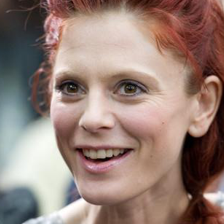

(224, 224, 4)
(224, 224, 3)


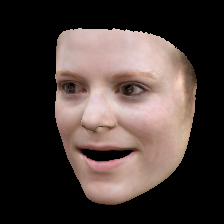

In [20]:
from PIL import Image
from IPython.display import display


file_path = "/home/haimingzhang/Research/Face/Deep3DFaceReconstruction/output/000002.mat"

face_params = loadmat(file_path)

print(face_params.keys())

cropped_img = face_params['cropped_img']
print(cropped_img.shape, cropped_img.dtype)
display(Image.fromarray(cropped_img))

recon_img = face_params['recon_img']
print(recon_img.shape)

recon_img = recon_img[..., :3]
print(recon_img.shape)

display(Image.fromarray(recon_img.astype(np.uint8)))




## Modify existing file according some conditions

In [ ]:
"""
dataset format:
TAudio id08885/cIqVKLOtfyk/00251 id08885/cIqVKLOtfyk/00251 5.31 0 5.31 0 0 146975
TFAudio id04335/WEed3nlDs80/00045 id04346/2rc759vfCb0/00003 5.88 0 3.58 3.58 5.88 146977
TSilence silence/4O2JKS94g3Y/20463 silence/4O2JKS94g3Y/20463 2.46 1.4 2.46 0 1.4 146979
"""
def remove_specified_lines(src_file, remove_list=[]):
    lines = open(src_file).read().splitlines()

    lines_new = []
    for line in lines:
        data = line.split()
        if data[0] in remove_list:
            continue
        lines_new.append(line)
    
    lines_new_str = "\n".join(lines_new)
    with open("test_new.txt", "w") as fp:
        fp.write(lines_new_str)

remove_specified_lines("./lists/lists_out/test.txt", remove_list=["TSilence", "TFAudio", "FSilence"])

## Load pickle file

In [1]:
import pickle

file_path = "/home/haimingzhang/Research/Face/FaceFormer/FaceFormer/training_data/subj_seq_to_idx.pkl"
data2array_verts = pickle.load(open(file_path, 'rb'))
print(len(data2array_verts), data2array_verts)

12 {'FaceTalk_170904_00128_TA': {'sentence37': {0: 30257, 1: 30258, 2: 30259, 3: 30260, 4: 30261, 5: 30262, 6: 30263, 7: 30264, 8: 30265, 9: 30266, 10: 30267, 11: 30268, 12: 30269, 13: 30270, 14: 30271, 15: 30272, 16: 30273, 17: 30274, 18: 30275, 19: 30276, 20: 30277, 21: 30278, 22: 30279, 23: 30280, 24: 30281, 25: 30282, 26: 30283, 27: 30284, 28: 30285, 29: 30286, 30: 30287, 31: 30288, 32: 30289, 33: 30290, 34: 30291, 35: 30292, 36: 30293, 37: 30294, 38: 30295, 39: 30296, 40: 30297, 41: 30298, 42: 30299, 43: 30300, 44: 30301, 45: 30302, 46: 30303, 47: 30304, 48: 30305, 49: 30306, 50: 30307, 51: 30308, 52: 30309, 53: 30310, 54: 30311, 55: 30312, 56: 30313, 57: 30314, 58: 30315, 59: 30316, 60: 30317, 61: 30318, 62: 30319, 63: 30320, 64: 30321, 65: 30322, 66: 30323, 67: 30324, 68: 30325, 69: 30326, 70: 30327, 71: 30328, 72: 30329, 73: 30330, 74: 30331, 75: 30332, 76: 30333, 77: 30334, 78: 30335, 79: 30336, 80: 30337, 81: 30338, 82: 30339, 83: 30340, 84: 30341, 85: 30342, 86: 30343, 87: 3